# Machine Learning Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_roc_curve, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn import linear_model, model_selection, metrics, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#!pip install catboost

Train set

In [ ]:
train_df = pd.read_csv(r'/content/drive/MyDrive/BT4012/Healthcare_datasets/df_final.csv')
train_df
# set providers as index
train_df = train_df.set_index('Provider')
# split x and y
x_train = train_df.drop(["PotentialFraud"], axis=1)
y_train = train_df['PotentialFraud']

Test set

In [ ]:
test_df = pd.read_csv(r'/content/drive/MyDrive/BT4012/Healthcare_datasets/test_final.csv')
test_df 
# set providers as index
test_df = test_df.set_index('Provider')
# split x and y
x_test = test_df.drop(["PotentialFraud"], axis=1)
y_test = test_df['PotentialFraud']

# Dimensionality Reduction Algorithm (PCA)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
# most important features (top 30)
model = PCA(n_components=30).fit(x_train)
X_pc = model.transform(x_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = x_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
d = pd.DataFrame(dic.items())
d

,0,1
0,PC0,mean_IPAnnualReimbursementAmt_per_CountUniqueP...
1,PC1,mean IPAnnualReimbursementAmt per DiagnosisGro...
2,PC2,IPAnnualReimbursementAmt
3,PC3,OPAnnualReimbursementAmt
4,PC4,count ClaimID per Provider & AttendingPhysician
5,PC5,mean_IPAnnualReimbursementAmt_per_OtherPhysician
6,PC6,mean_IPAnnualReimbursementAmt_per_OperatingPhy...
7,PC7,mean_IPAnnualReimbursementAmt_per_ClmDiagnosis...
8,PC8,mean IPAnnualReimbursementAmt per ClmAdmitDiag...
9,PC9,mean_InscClaimAmtReimbursed_per_CountUniquePhy...


# Logistic Regression


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Add synthetic samples

In [ ]:
# smote, creates synthetic samples from the minor class
# randomly chooses one of the k-nearest-neighbors 
# and using it to create a similar, but randomly tweaked, new observations

os = SMOTE(random_state=0)
columns = x_train.columns
os_data_X,os_data_y=os.fit_resample(x_train, np.ravel(y_train))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not fraud in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of fraud",len(os_data_y[os_data_y['y']==1]))
print("Proportion of not fraud data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  9674
Number of not fraud in oversampled data 4837
Number of fraud 4837
Proportion of not fraud data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [ ]:
os_data_X,os_data_y=os.fit_resample(x_train, np.ravel(y_train))
os_data_X = pd.DataFrame(data=x_train,columns=columns)
os_data_y = pd.DataFrame(data=y_train,columns=['PotentialFraud'])

Recursive feature elimination for logistic regression

In [ ]:
# recursive feature elimination
data_final_vars=os_data_X.columns.values.tolist()

y=['PotentialFraud']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
# select top 30 features
rfe = RFE(logreg, step = 20, n_features_to_select=30)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False False False False False
 False False  True False False False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False  True False  True
 False False False False False  True False False False False False  True
 False  True False False False  True  True False False False False False
 False False False False False False  True False False False False False
 False False False False  True False False False  True  True False  True
 False False False  True False False  True False  True False False False
 False  True False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False Fa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
selectedFeatures = []
currCols = os_data_X.columns.values
for i, boolVal in enumerate(rfe.support_):
  if boolVal == True:
    selectedFeatures.append(currCols[i])

print(len(selectedFeatures))

30


In [ ]:
# select features from RFE
cols=selectedFeatures
x_train=os_data_X[cols]
y_train=os_data_y['PotentialFraud']
x_test = x_test[cols]

In [ ]:
# standardized scaling
scaler = StandardScaler().fit(x_train)
xTrain_scaled = scaler.transform(x_train)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

logRegModel = LogisticRegressionCV(cv = 10, class_weight = 'balanced', solver = 'sag', random_state = 123, max_iter = 1000)
logRegModel.fit(x_train, y_train)

# predict probability 
logRegModel_trainProb = logRegModel.predict_proba(x_train)
logRegModel_testProb = logRegModel.predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


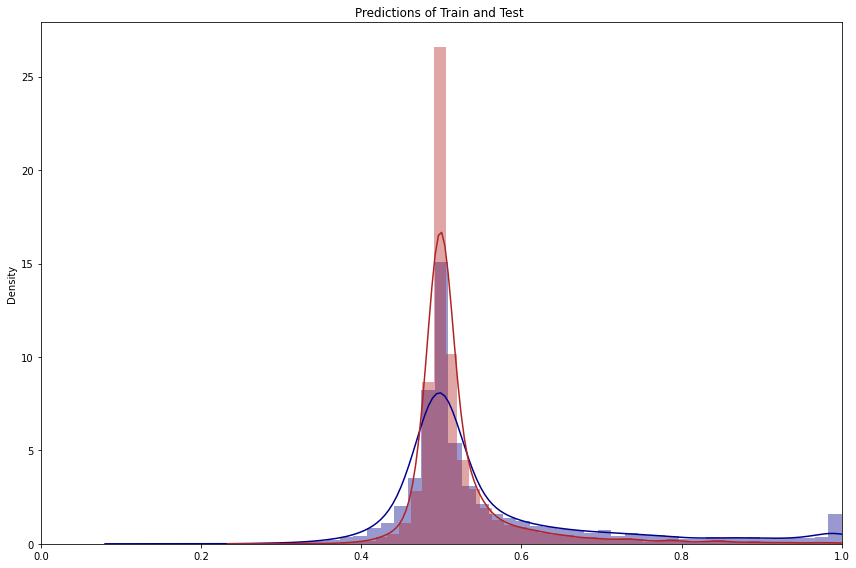

In [ ]:
fig = plt.figure(figsize=(12,8))

sns.distplot(logRegModel_trainProb[:,1],color='darkblue')
sns.distplot(logRegModel_testProb[:,1],color='firebrick')
plt.title('Predictions of Train and Test ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


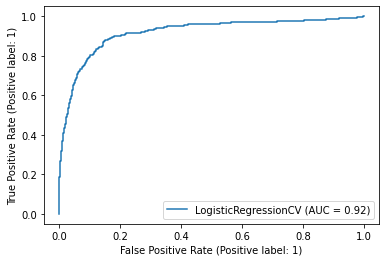

In [ ]:
plot_roc_curve(logRegModel,x_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_train,logRegModel.predict_proba(x_train)[:,1],drop_intermediate=False)
thresholds[np.argmin(np.abs(fpr+tpr-1))]

0.6044070426390532

In [ ]:
# set probability threshold to 60%
logTrain_pred60 = (logRegModel_trainProb[:,1]>0.60).astype(bool)
logTest_pred60 = (logRegModel_testProb[:,1]>0.60).astype(bool)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Logistic Regression: ")

# train scores
print("\nTrain")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, logTrain_pred60)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, logTrain_pred60)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, logTrain_pred60)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, logTrain_pred60)
print('F1 score: %f' % f1)

print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, logTest_pred60)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, logTest_pred60)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, logTest_pred60)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, logTest_pred60)
print('F1 score: %f' % f1)

Logistic Regression: 

Train
Accuracy: 0.855512
Precision: 0.384146
Recall: 0.871542
F1 score: 0.533253

Test
Accuracy: 0.912825
Precision: 0.602381
Recall: 0.503984
F1 score: 0.548807


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [ ]:
# Fitting random forest classifier with ALL features
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Train")
pred_train = rf.predict(x_train)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

print("\nTest")
pred_test = rf.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Train
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000

Test
Accuracy: 0.902766
Precision: 0.880000
Recall: 0.087649
F1 score: 0.159420


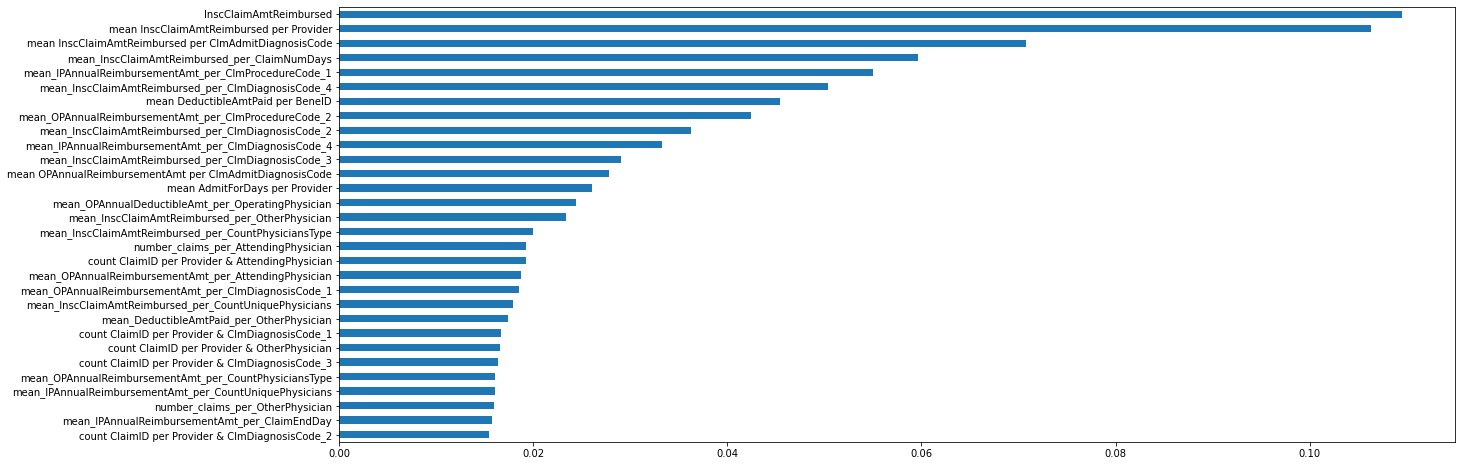

In [ ]:
# feature importance
plt.figure(figsize=(20,8))
pd.Series(rf.feature_importances_, index=x_train.columns).nlargest(30).plot(kind='barh').invert_yaxis()

In [ ]:
# getting list of most important features
impt_features = pd.Series(rf.feature_importances_, index=x_train.columns).nlargest(30).index.tolist()
impt_features

['InscClaimAmtReimbursed',
 'mean InscClaimAmtReimbursed per Provider',
 'mean InscClaimAmtReimbursed per ClmAdmitDiagnosisCode',
 'mean_InscClaimAmtReimbursed_per_ClaimNumDays',
 'mean_IPAnnualReimbursementAmt_per_ClmProcedureCode_1',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_4',
 'mean DeductibleAmtPaid per BeneID',
 'mean_OPAnnualReimbursementAmt_per_ClmProcedureCode_2',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_2',
 'mean_IPAnnualReimbursementAmt_per_ClmDiagnosisCode_4',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_3',
 'mean OPAnnualReimbursementAmt per ClmAdmitDiagnosisCode',
 'mean AdmitForDays per Provider',
 'mean_OPAnnualDeductibleAmt_per_OperatingPhysician',
 'mean_InscClaimAmtReimbursed_per_OtherPhysician',
 'mean_InscClaimAmtReimbursed_per_CountPhysiciansType',
 'number_claims_per_AttendingPhysician',
 'count ClaimID per Provider & AttendingPhysician',
 'mean_OPAnnualReimbursementAmt_per_AttendingPhysician',
 'mean_OPAnnualReimbursementAmt_per_ClmDi

In [ ]:
# Fitting random forest classifier with 30 features
rf_30 = RandomForestClassifier(n_estimators=100)
rf_30.fit(x_train[impt_features], y_train)

RandomForestClassifier()

In [ ]:
print("Random Forest: ")

# train scores
pred_train = rf_30.predict(x_train[impt_features])

print("\nTrain")
pred_train = rf.predict(x_train)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = rf_30.predict(x_test[impt_features])
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Random Forest: 

Train


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000

Test
Accuracy: 0.901299
Precision: 0.918919
Recall: 0.067729
F1 score: 0.126160


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



In [ ]:
# Permutation Importance using ALL features (Good for features with high cardinality)
result = permutation_importance(rf, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

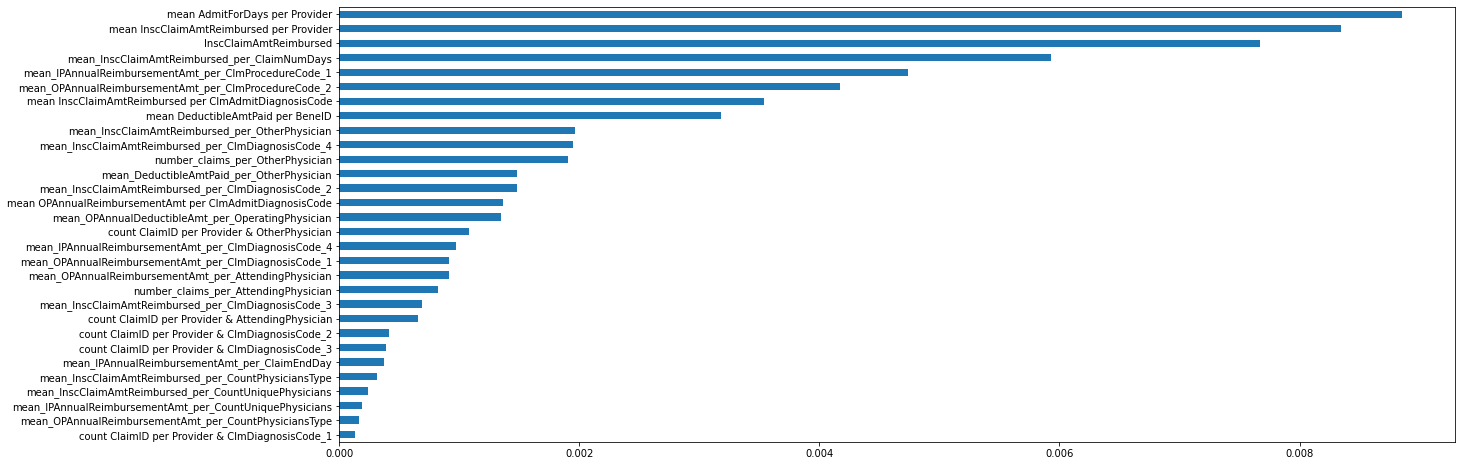

In [ ]:
# permutation importance
plt.figure(figsize=(20,8))
pd.Series(result.importances_mean, index=x_train.columns).nlargest(30).plot(kind='barh').invert_yaxis()

In [ ]:
# getting list of most important features
perm_impt_features = pd.Series(result.importances_mean, index=x_train.columns).nlargest(30).index.tolist()
perm_impt_features

['mean AdmitForDays per Provider',
 'mean InscClaimAmtReimbursed per Provider',
 'InscClaimAmtReimbursed',
 'mean_InscClaimAmtReimbursed_per_ClaimNumDays',
 'mean_IPAnnualReimbursementAmt_per_ClmProcedureCode_1',
 'mean_OPAnnualReimbursementAmt_per_ClmProcedureCode_2',
 'mean InscClaimAmtReimbursed per ClmAdmitDiagnosisCode',
 'mean DeductibleAmtPaid per BeneID',
 'mean_InscClaimAmtReimbursed_per_OtherPhysician',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_4',
 'number_claims_per_OtherPhysician',
 'mean_DeductibleAmtPaid_per_OtherPhysician',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_2',
 'mean OPAnnualReimbursementAmt per ClmAdmitDiagnosisCode',
 'mean_OPAnnualDeductibleAmt_per_OperatingPhysician',
 'count ClaimID per Provider & OtherPhysician',
 'mean_IPAnnualReimbursementAmt_per_ClmDiagnosisCode_4',
 'mean_OPAnnualReimbursementAmt_per_ClmDiagnosisCode_1',
 'mean_OPAnnualReimbursementAmt_per_AttendingPhysician',
 'number_claims_per_AttendingPhysician',
 'mean_InscClaim

In [ ]:
# Fitting random forest classifier with 30 features from permutation
rf_30_perm = RandomForestClassifier(n_estimators=100)
rf_30_perm.fit(x_train[perm_impt_features], y_train)

RandomForestClassifier()

In [ ]:
print("Random Forest with Permutation Importance: ")
# train scores
pred_train = rf_30_perm.predict(x_train[perm_impt_features])

print("\nTrain")
pred_train = rf.predict(x_train)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = rf_30_perm.predict(x_test[perm_impt_features])
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Random Forest with Permutation Importance: 

Train
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000

Test
Accuracy: 0.902766
Precision: 0.913043
Recall: 0.083665
F1 score: 0.153285


### Best RF model: RandomForest classifier using features selected by permutation importance (rf_30_perm)

In [ ]:
# Fine-tuning our model
param_grid = {"class_weight" :   ["balanced", None],
              "n_estimators": [100, 200],
              "criterion": ["gini", "entropy"]
             }

In [ ]:
# Using GridSearchCV to find optimal parameters
gs = GridSearchCV(estimator = rf_30_perm, param_grid = param_grid, 
                   cv=5, verbose=2)
best_rf = gs.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END class_weight=balanced, criterion=gini, n_estimators=100; total time=   1.3s
[CV] END class_weight=balanced, criterion=gini, n_estimators=100; total time=   1.3s
[CV] END class_weight=balanced, criterion=gini, n_estimators=100; total time=   1.3s
[CV] END class_weight=balanced, criterion=gini, n_estimators=100; total time=   1.3s
[CV] END class_weight=balanced, criterion=gini, n_estimators=100; total time=   1.2s
[CV] END class_weight=balanced, criterion=gini, n_estimators=200; total time=   2.5s
[CV] END class_weight=balanced, criterion=gini, n_estimators=200; total time=   2.5s
[CV] END class_weight=balanced, criterion=gini, n_estimators=200; total time=   2.5s
[CV] END class_weight=balanced, criterion=gini, n_estimators=200; total time=   2.6s
[CV] END class_weight=balanced, criterion=gini, n_estimators=200; total time=   2.5s
[CV] END class_weight=balanced, criterion=entropy, n_estimators=100; total time=   1.9s
[C

In [ ]:
print('Best Class Weight:', best_rf.best_estimator_.get_params()['class_weight'])
print('Best No. of Estimators:', best_rf.best_estimator_.get_params()['n_estimators'])
print('Best Criterion:', best_rf.best_estimator_.get_params()['criterion'])

Best Class Weight: None
Best No. of Estimators: 100
Best Criterion: entropy


In [ ]:
print("Random Forest with Permutation Importance and GridSearchCV: ")
# train scores
pred_train = best_rf.predict(x_train)

print("\nTrain")
pred_train = rf.predict(x_train)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

# validation scores
pred = best_rf.predict(x_test)

print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Random Forest with Permutation Importance and GridSearchCV: 

Train
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000

Test
Accuracy: 0.903395
Precision: 0.936170
Recall: 0.087649
F1 score: 0.160291


# Gradient boosting algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Fitting gradient boosting classifier with ALL features
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
print("Gradient Boosting: ")
# train scores
pred_train = gb.predict(x_train)

print("\nTrain")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = gb.predict(x_test)
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Gradient Boosting: 

Train
Accuracy: 0.962381
Precision: 0.949853
Recall: 0.636364
F1 score: 0.762130

Test
Accuracy: 0.903395
Precision: 0.847458
Recall: 0.099602
F1 score: 0.178253


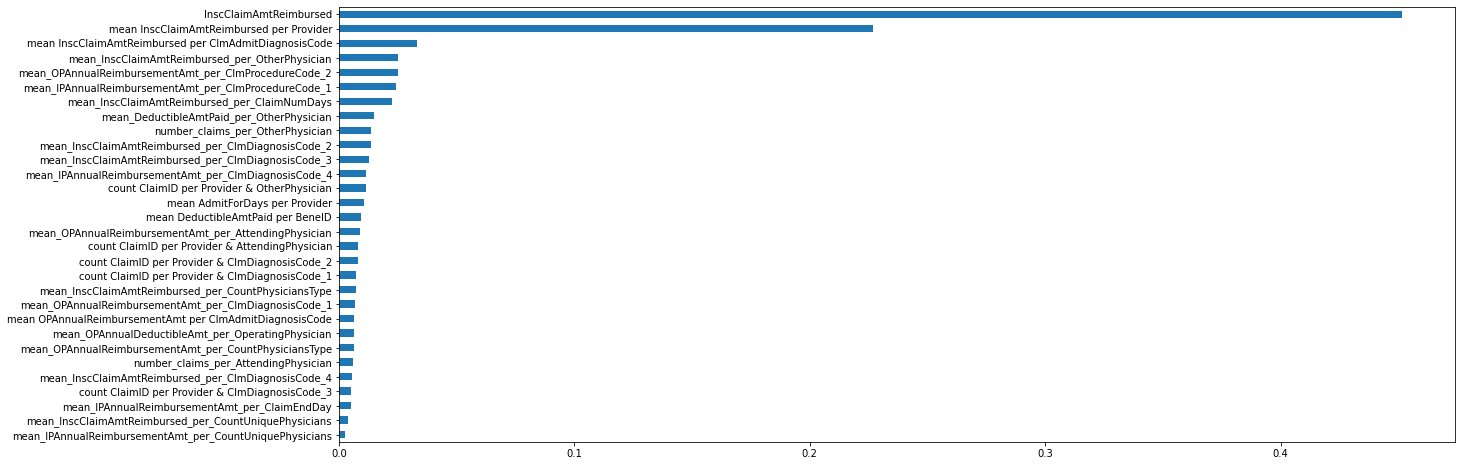

In [ ]:
# feature importance
plt.figure(figsize=(20,8))
pd.Series(gb.feature_importances_, index=x_train.columns).nlargest(30).plot(kind='barh').invert_yaxis()

In [ ]:
# getting list of most important features
impt_features = pd.Series(gb.feature_importances_, index=x_train.columns).nlargest(30).index.tolist()
impt_features

['InscClaimAmtReimbursed',
 'mean InscClaimAmtReimbursed per Provider',
 'mean InscClaimAmtReimbursed per ClmAdmitDiagnosisCode',
 'mean_InscClaimAmtReimbursed_per_OtherPhysician',
 'mean_OPAnnualReimbursementAmt_per_ClmProcedureCode_2',
 'mean_IPAnnualReimbursementAmt_per_ClmProcedureCode_1',
 'mean_InscClaimAmtReimbursed_per_ClaimNumDays',
 'mean_DeductibleAmtPaid_per_OtherPhysician',
 'number_claims_per_OtherPhysician',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_2',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_3',
 'mean_IPAnnualReimbursementAmt_per_ClmDiagnosisCode_4',
 'count ClaimID per Provider & OtherPhysician',
 'mean AdmitForDays per Provider',
 'mean DeductibleAmtPaid per BeneID',
 'mean_OPAnnualReimbursementAmt_per_AttendingPhysician',
 'count ClaimID per Provider & AttendingPhysician',
 'count ClaimID per Provider & ClmDiagnosisCode_2',
 'count ClaimID per Provider & ClmDiagnosisCode_1',
 'mean_InscClaimAmtReimbursed_per_CountPhysiciansType',
 'mean_OPAnnualR

In [ ]:
# Fitting random forest classifier with 30 features
gb_30 = GradientBoostingClassifier(n_estimators=100)
gb_30.fit(x_train[impt_features], y_train)

GradientBoostingClassifier()

In [ ]:
print("Gradient Boosting with Feature Importance: ")
# train scores
pred_train = gb_30.predict(x_train[impt_features])

print("Train")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = gb_30.predict(x_test[impt_features])
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Gradient Boosting with Feature Importance: 
Train
Accuracy: 0.962381
Precision: 0.949853
Recall: 0.636364
F1 score: 0.762130

Test
Accuracy: 0.902976
Precision: 0.819672
Recall: 0.099602
F1 score: 0.177620


In [ ]:
# Permutation Importance using ALL features (Good for features with high cardinality)
result_gb = permutation_importance(gb, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

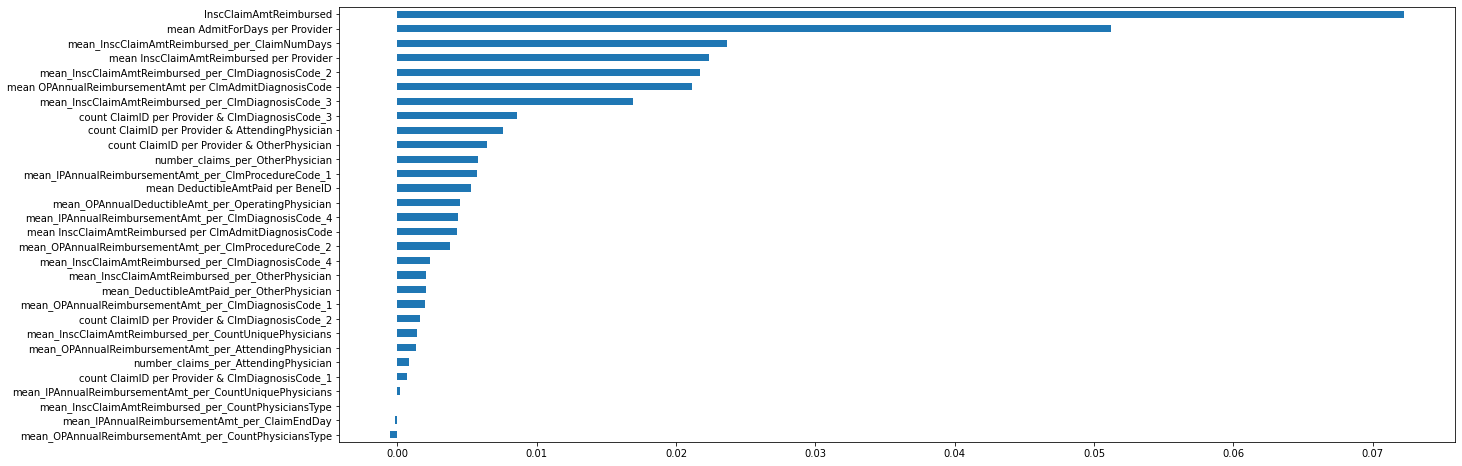

In [ ]:
# permutation importance
plt.figure(figsize=(20,8))
pd.Series(result_gb.importances_mean, index=x_train.columns).nlargest(30).plot(kind='barh').invert_yaxis()

In [ ]:
# getting list of most important features
perm_impt_features = pd.Series(result_gb.importances_mean, index=x_train.columns).nlargest(30).index.tolist()
perm_impt_features

['InscClaimAmtReimbursed',
 'mean AdmitForDays per Provider',
 'mean_InscClaimAmtReimbursed_per_ClaimNumDays',
 'mean InscClaimAmtReimbursed per Provider',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_2',
 'mean OPAnnualReimbursementAmt per ClmAdmitDiagnosisCode',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_3',
 'count ClaimID per Provider & ClmDiagnosisCode_3',
 'count ClaimID per Provider & AttendingPhysician',
 'count ClaimID per Provider & OtherPhysician',
 'number_claims_per_OtherPhysician',
 'mean_IPAnnualReimbursementAmt_per_ClmProcedureCode_1',
 'mean DeductibleAmtPaid per BeneID',
 'mean_OPAnnualDeductibleAmt_per_OperatingPhysician',
 'mean_IPAnnualReimbursementAmt_per_ClmDiagnosisCode_4',
 'mean InscClaimAmtReimbursed per ClmAdmitDiagnosisCode',
 'mean_OPAnnualReimbursementAmt_per_ClmProcedureCode_2',
 'mean_InscClaimAmtReimbursed_per_ClmDiagnosisCode_4',
 'mean_InscClaimAmtReimbursed_per_OtherPhysician',
 'mean_DeductibleAmtPaid_per_OtherPhysician',
 'mean_OPAnn

In [ ]:
# Fitting random forest classifier with 30 features from permutation
gb_30_perm = GradientBoostingClassifier(n_estimators=100)
gb_30_perm.fit(x_train[perm_impt_features], y_train)

GradientBoostingClassifier()

In [ ]:
print("Gradient Boosting with Permutation Importance: ")
# train scores
pred_train = gb_30_perm.predict(x_train[perm_impt_features])
print("Train")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = gb_30_perm.predict(x_test[perm_impt_features])
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Gradient Boosting with Permutation Importance: 
Train
Accuracy: 0.134756
Precision: 0.098498
Recall: 0.998024
F1 score: 0.179301

Test
Accuracy: 0.200545
Precision: 0.115750
Recall: 0.994024
F1 score: 0.207355


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



### Best GB model: Gradient boosting classifier using features selected by model's feature importance (gb_30)

In [ ]:
# Fine-tuning our model
param_grid = {"learning_rate" : [0.01, 0.1],
              "n_estimators": [100, 200],
             }

In [ ]:
# Using GridSearchCV to find optimal parameters
gs = GridSearchCV(estimator = gb_30, param_grid = param_grid, 
                   cv=5, verbose=2)
best_gb = gs.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   4.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   8.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   5.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   4.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   7.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   7.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   6.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   6.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   6.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   8.4s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   3.4s
[CV] END ................learning_rate=0.1, n_est

In [ ]:
print('Best Learning Rate:', best_gb.best_estimator_.get_params()['learning_rate'])
print('Best No. of Estimators:', best_gb.best_estimator_.get_params()['n_estimators'])

Best Learning Rate: 0.01
Best No. of Estimators: 200


In [ ]:
print("Best Gradient Boosting Model: ")
# validation scores
pred_test = best_gb.predict(x_test)

print("Test")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Best Gradient Boosting Model: 
Test
Accuracy: 0.900251
Precision: 0.964286
Recall: 0.053785
F1 score: 0.101887


# Naive Bayes

In [ ]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

In [ ]:
print("Naive Bayes: ")
# train scores
pred_train = nb.predict(x_train)
print("\nTrain")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = nb.predict(x_test)
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Naive Bayes: 

Train
Accuracy: 0.758375
Precision: 0.239549
Recall: 0.713439
F1 score: 0.358669

Test
Accuracy: 0.788768
Precision: 0.284130
Recall: 0.663347
F1 score: 0.397849


# Decision Tree

### Decision Tree based on Feature Importance

In [ ]:
from yellowbrick.model_selection import FeatureImportances

In [ ]:
dt_viz = DecisionTreeClassifier(max_depth=3,random_state=43)
dt_viz.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

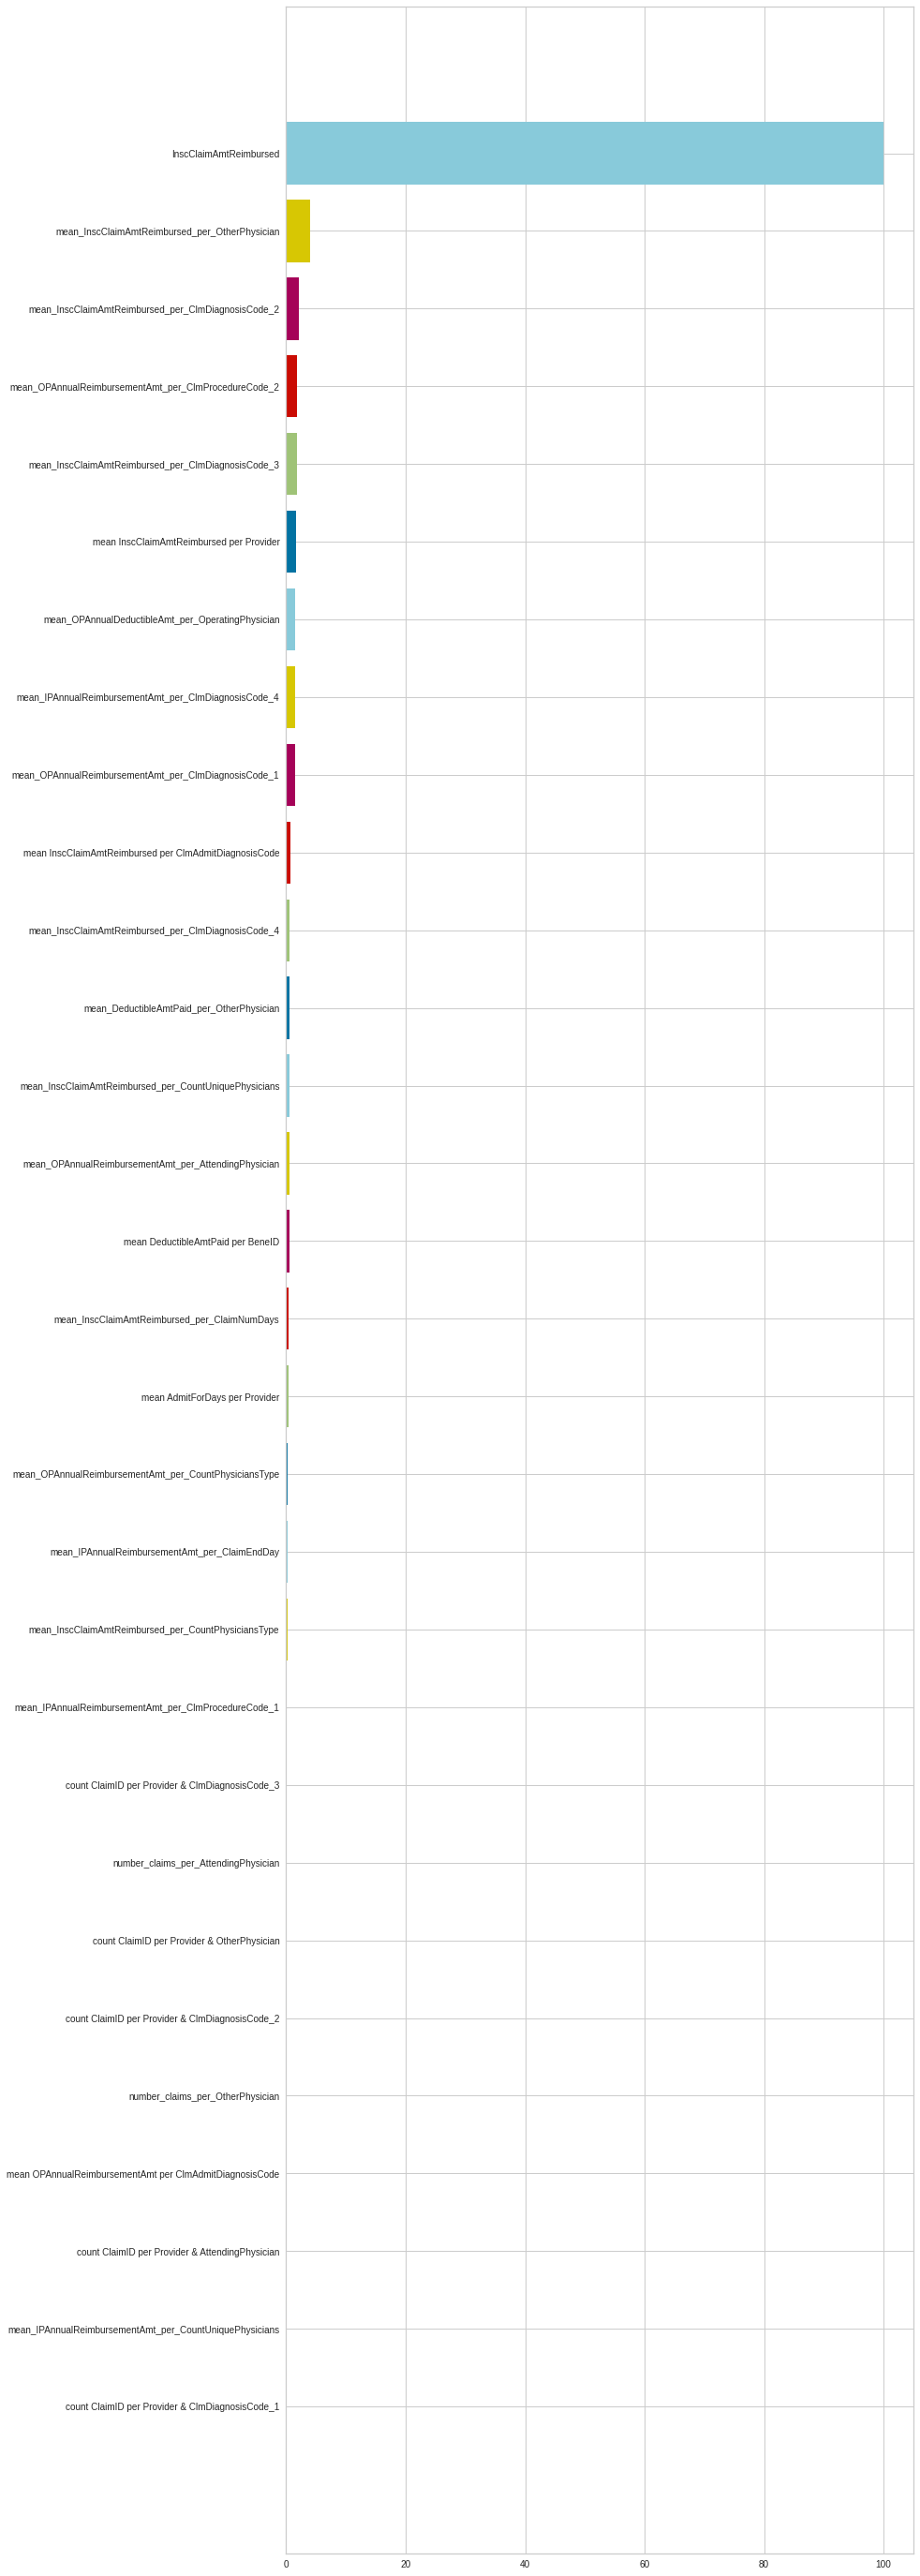

In [ ]:
fig , ax = plt.subplots(figsize=(12,50))
dt_hp = DecisionTreeClassifier(max_depth= 9,min_samples_leaf= 25, min_samples_split=5 ,random_state=43)
tree_viz = FeatureImportances(dt_hp)
tree_viz.fit(x_train,y_train)
plt.show()

### Visualising the Decision Tree

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = clf.fit(x_train,y_train)

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 164070.00
|   |--- feature_0 <= 75050.00
|   |   |--- feature_0 <= 31970.00
|   |   |   |--- feature_2 <= 75.50
|   |   |   |   |--- feature_22 <= 5237.65
|   |   |   |   |   |--- feature_4 <= 20651.04
|   |   |   |   |   |   |--- feature_24 <= 2932.14
|   |   |   |   |   |   |   |--- feature_3 <= 445.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  445.00
|   |   |   |   |   |   |   |   |--- feature_24 <= 218.33
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_24 >  218.33
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_24 >  2932.14
|   |   |   |   |   |   |   |--- feature_23 <= 1869.56
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_23 >  1869.56
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  20651.04
|   |   |   |   |   |   |--- feature_24 <= 1863.88
|   |   | 

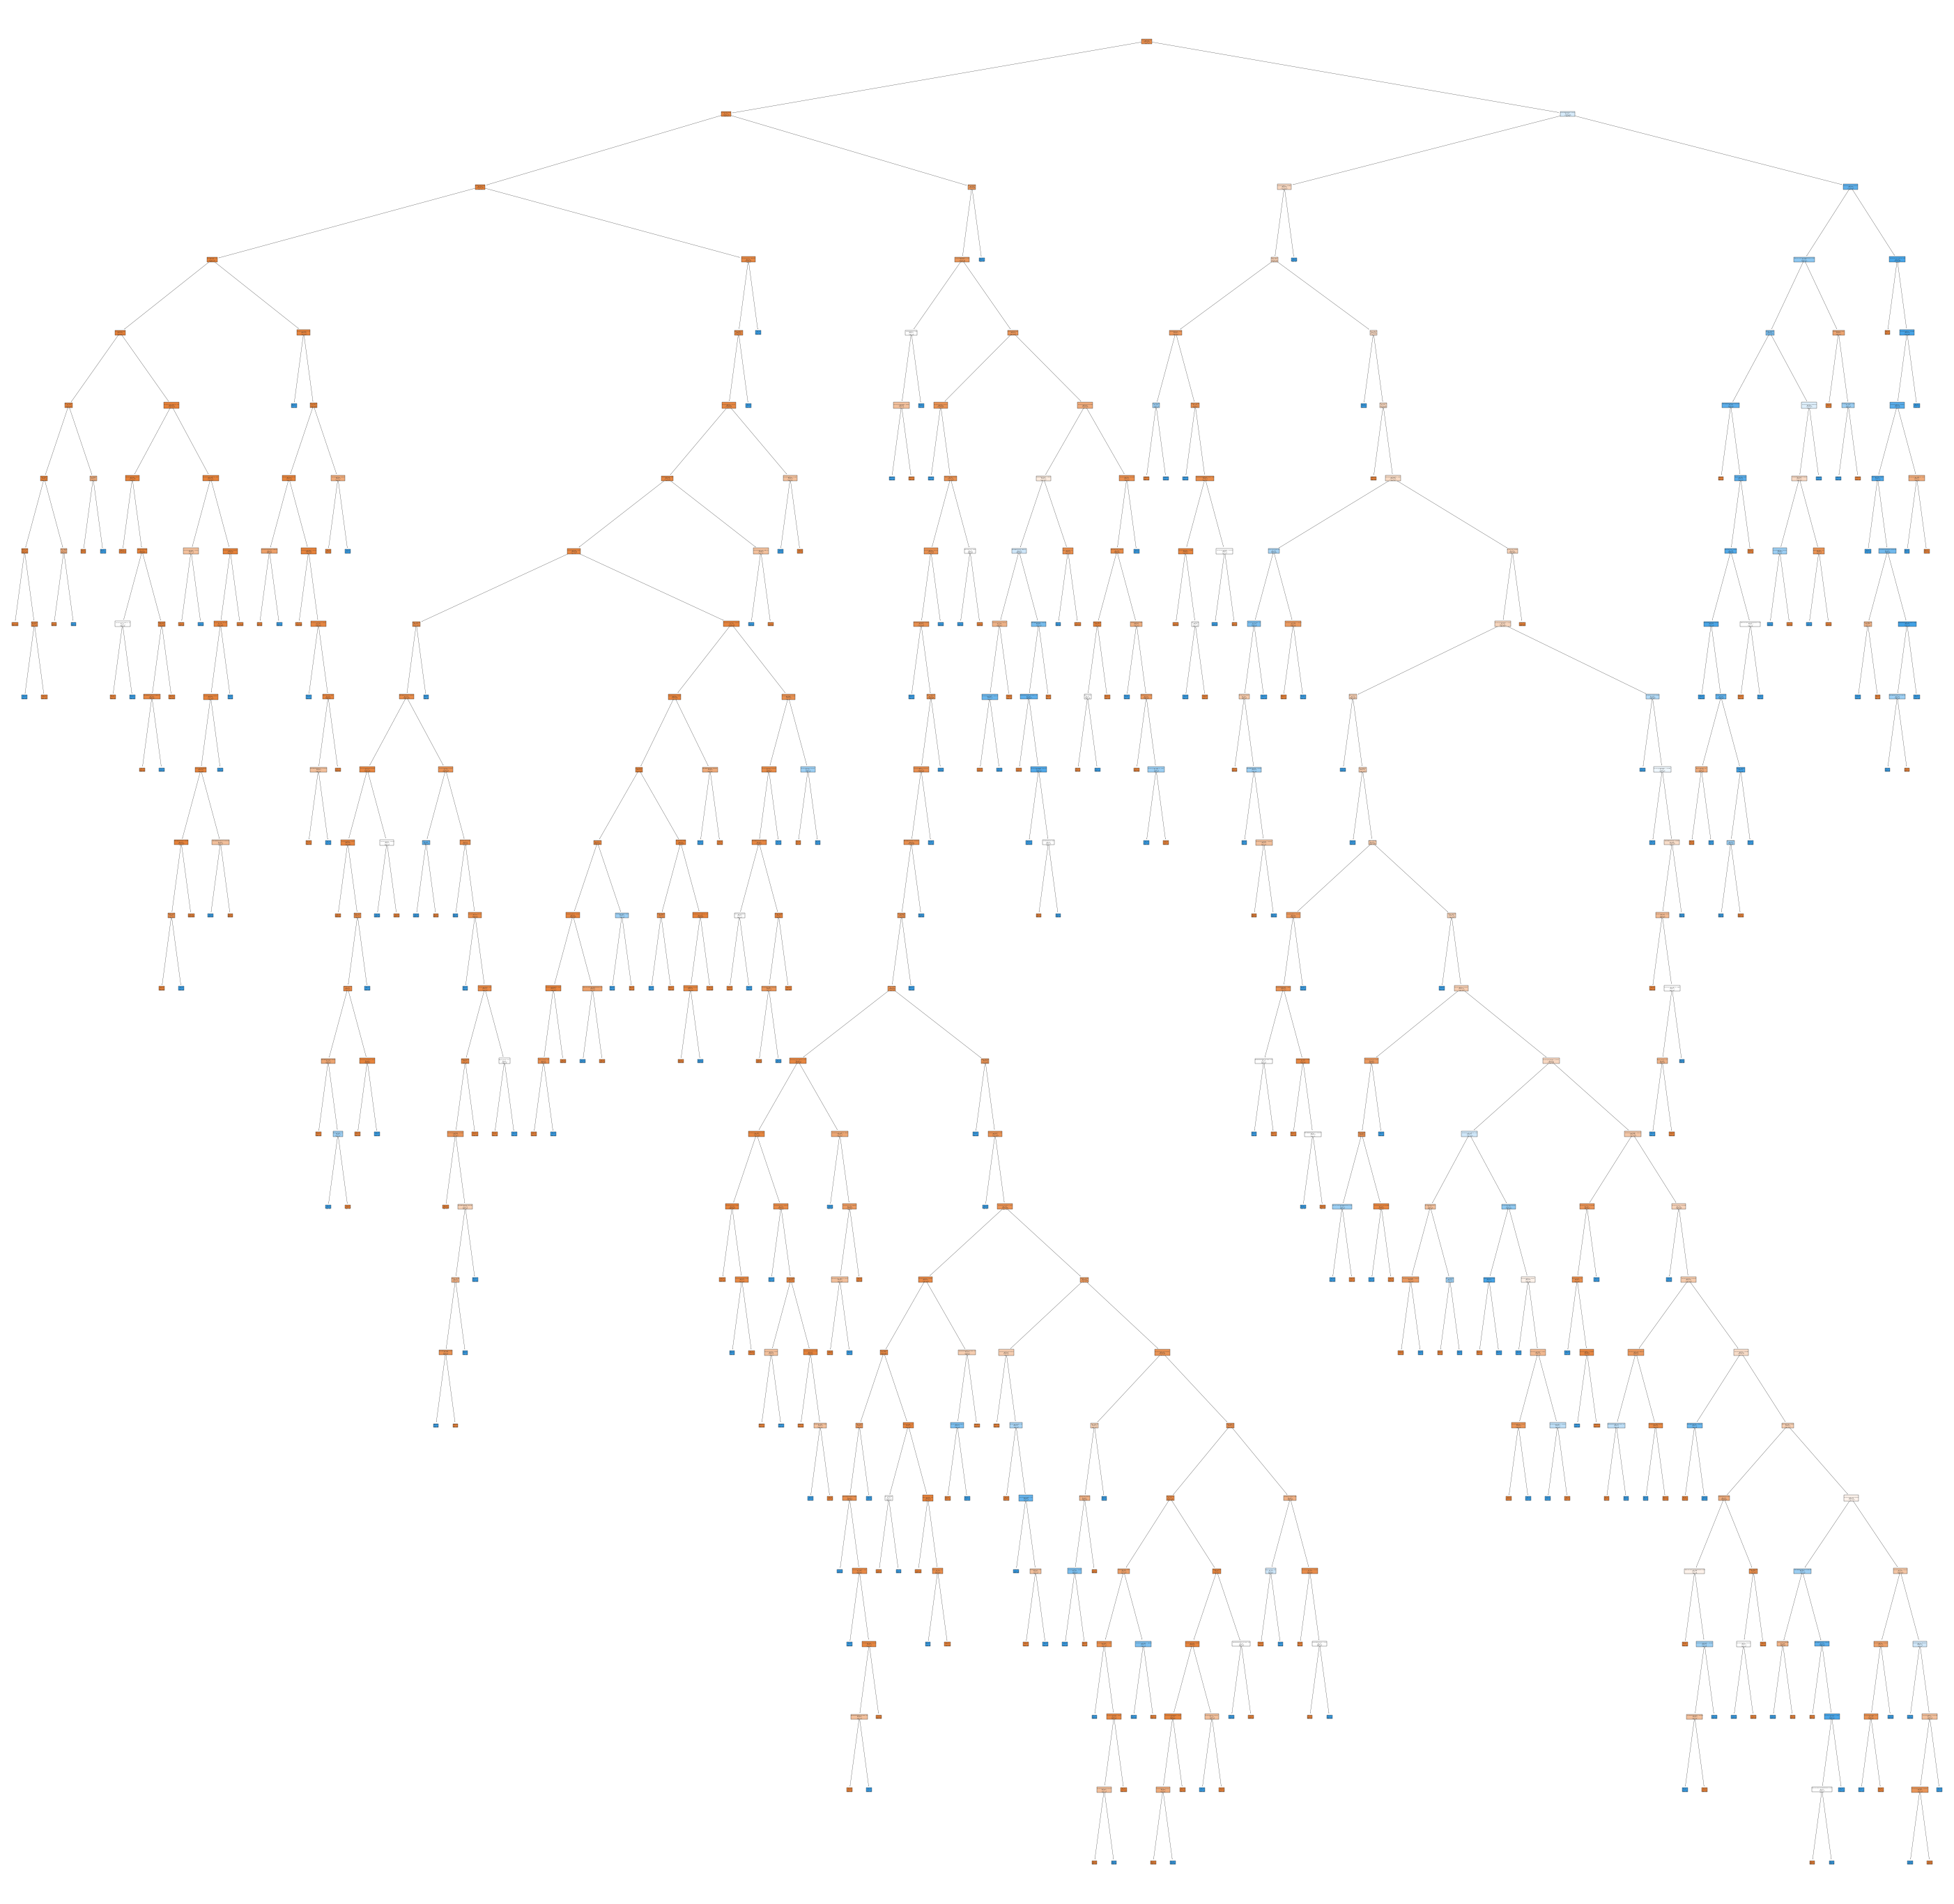

In [ ]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf, 
                   feature_names= train_df.columns,  
                   class_names= ['Yes', 'No'],
                   filled=True)
plt.savefig('DecisionTree.png')

In [ ]:
from google.colab import files
files.download('DecisionTree.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
feature_cols = ['mean_InscClaimAmtReimbursed_per_AttendingPhysician',
                'mean InscClaimAmtReimbursed per Provider',
                'mean InscClaimAmtReimbursed per DiagnosisGroupCode',
                'mean_IPAnnualDeductibleAmt_per_OtherPhysician',
                'mean_AdmitForDays_per_ClmDiagnosisCode_4',
                'mean OPAnnualReimbursementAmt per DiagnosisGroupCode',
                'mean_InscClaimAmtReimbursed_per_ClaimNumDays',
                'count ClaimID per Provider & BeneID',
                'count ClaimID per Provider & ClmDiagnosisCode_6',
                'count ClaimID per Provider & ClmAdmitDiagnosisCode',
                'mean AdmitForDays per BeneID',
                'number_claims_per_OtherPhysician',
                'mean_DeductibleAmtPaid_per_ClmDiagnosisCode_3',
                'mean_ClaimNumDays_per_AttendingPhysician',
                'mean_OPAnnualReimbursementAmt_per_ClmDiagnosisCode_3',
                'mean_ClaimNumDays_per_OperatingPhysician',
                'mean_DeductibleAmtPaid_per_OtherPhysician',
                'mean_IPAnnualDeductibleAmt_per_ClmProcedureCode_3',
                'mean_OPAnnualReimbursementAmt_per_OperatingPhysician',
                'mean OPAnnualDeductibleAmt per DiagnosisGroupCode',
                'mean_DeductibleAmtPaid_per_ClmDiagnosisCode_4',
                'mean IPAnnualReimbursementAmt per ClmAdmitDiagnosisCode',
                'mean AdmitForDays per Provider',
                'AdmitForDays',
                'count ClaimID per Provider & ClmDiagnosisCode_2',
                'InscClaimAmtReimbursed',
                'count ClaimID per Provider & AttendingPhysician',
                'mean DeductibleAmtPaid per ClmAdmitDiagnosisCode',
                'count ClaimID per Provider & OtherPhysician',
                'mean_InscClaimAmtReimbursed_per_ClaimEndDay']
       
x_train1 = train_df[feature_cols] # Features
y_train1 = train_df.PotentialFraud # Target variable\
x_test1 = test_df[feature_cols] # Features
    
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(x_train1,y_train1)

In [ ]:
print("Decision Tree Classifier: ")
# train scores
pred_train = clf1.predict(x_train1)
print("Train")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = clf1.predict(x_test1)
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Decision Tree Classifier: 
Train
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000

Test
Accuracy: 0.899413
Precision: 0.560440
Recall: 0.203187
F1 score: 0.298246


# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i=knn.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.09911986588432523,
 0.0997485331098072,
 0.09660519698239732,
 0.10058675607711651,
 0.0972338642078793,
 0.0997485331098072,
 0.09786253143336128,
 0.09932942162615256,
 0.09786253143336128,
 0.09911986588432523,
 0.09828164291701592,
 0.0997485331098072,
 0.09849119865884325,
 0.10037720033528919,
 0.09828164291701592,
 0.10016764459346186,
 0.0989103101424979,
 0.10016764459346186,
 0.09911986588432523,
 0.10016764459346186,
 0.0989103101424979,
 0.10058675607711651,
 0.10016764459346186,
 0.10100586756077116,
 0.10037720033528919,
 0.10121542330259849,
 0.10016764459346186,
 0.10079631181894384,
 0.0997485331098072,
 0.10100586756077116]

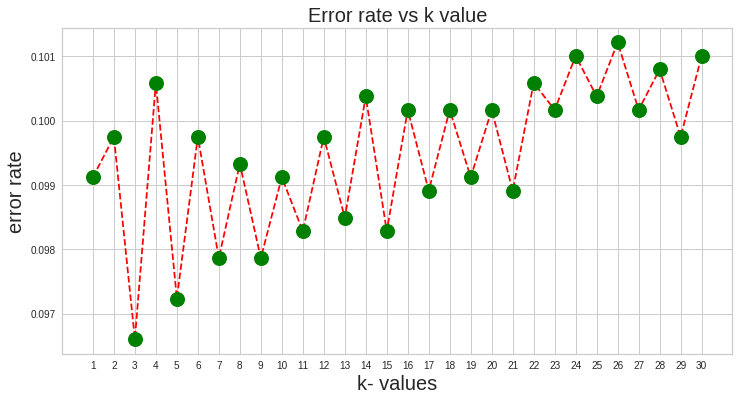

In [ ]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

print("K-Nearest Neighbours: ")
# train scores
pred_train = classifier.predict(x_train)
print("\nTrain")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = classifier.predict(x_test)
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)
#Feature importance is not defined for the KNN Classification algorithm. 
#There is no easy way to compute the features responsible for a classification here. 

K-Nearest Neighbours: 

Train
Accuracy: 0.938237
Precision: 0.830827
Recall: 0.436759
F1 score: 0.572539

Test
Accuracy: 0.901090
Precision: 0.941176
Recall: 0.063745
F1 score: 0.119403


# XGBoost

In [ ]:
from xgboost import XGBClassifier

# fit model to training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

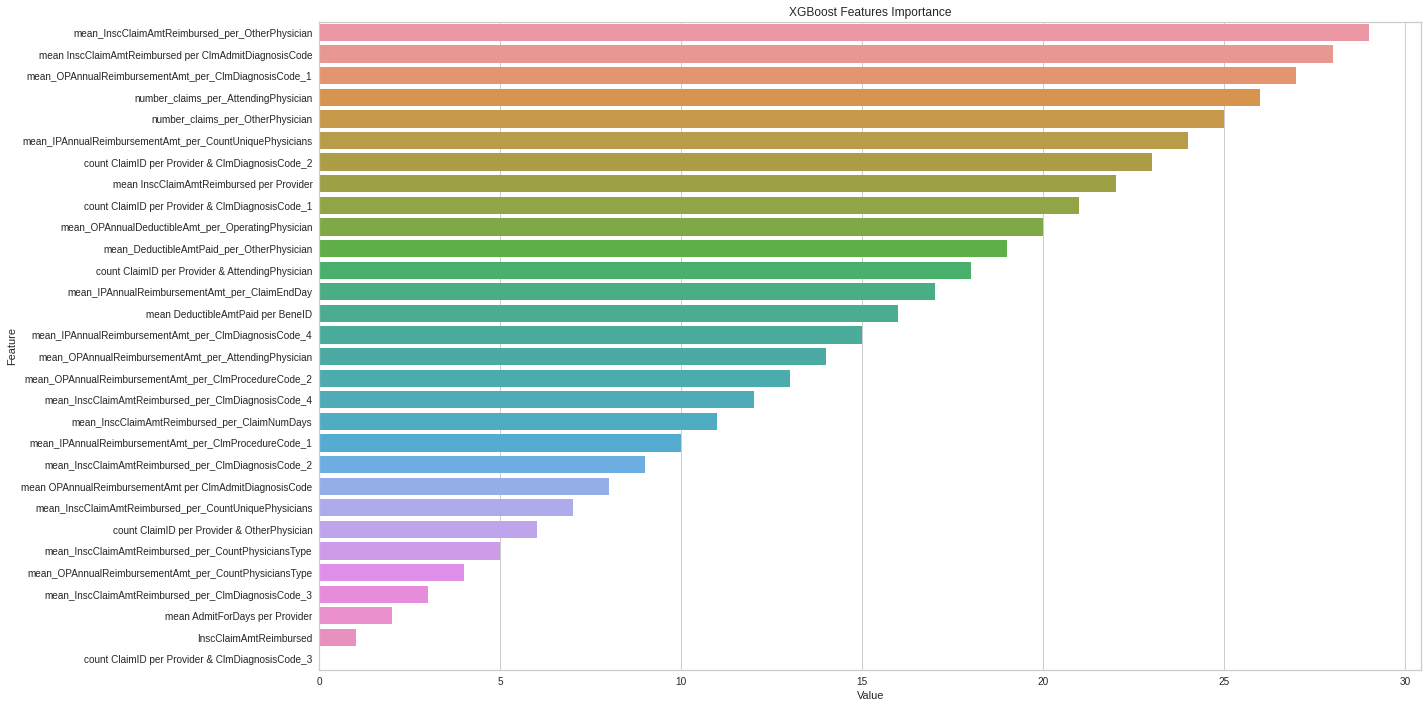

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_.argsort()[:60], x_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sn.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features Importance')
plt.tight_layout()
plt.show()

In [ ]:
# train scores
pred_train = model.predict(x_train)
pred_train = [round(value) for value in pred_train]
print("Train")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = model.predict(x_test)
pred_test = [round(value) for value in pred_test]
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)


Train
Accuracy: 0.948531
Precision: 0.896907
Recall: 0.515810
F1 score: 0.654956

Test
Accuracy: 0.901509
Precision: 0.921053
Recall: 0.069721
F1 score: 0.129630


# LightGBM

In [ ]:
import lightgbm as lgb

model2 = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model2.fit(x_train, y_train, eval_set = [(x_test, y_test), (x_train, y_train)], verbose=20, eval_metric='logloss')

[20]	training's binary_logloss: 0.121323	training's binary_logloss: 0.121323	valid_0's binary_logloss: 0.285315	valid_0's binary_logloss: 0.285315
[40]	training's binary_logloss: 0.0832394	training's binary_logloss: 0.0832394	valid_0's binary_logloss: 0.311173	valid_0's binary_logloss: 0.311173
[60]	training's binary_logloss: 0.0634138	training's binary_logloss: 0.0634138	valid_0's binary_logloss: 0.339399	valid_0's binary_logloss: 0.339399
[80]	training's binary_logloss: 0.0492742	training's binary_logloss: 0.0492742	valid_0's binary_logloss: 0.362267	valid_0's binary_logloss: 0.362267
[100]	training's binary_logloss: 0.0382622	training's binary_logloss: 0.0382622	valid_0's binary_logloss: 0.380818	valid_0's binary_logloss: 0.380818


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

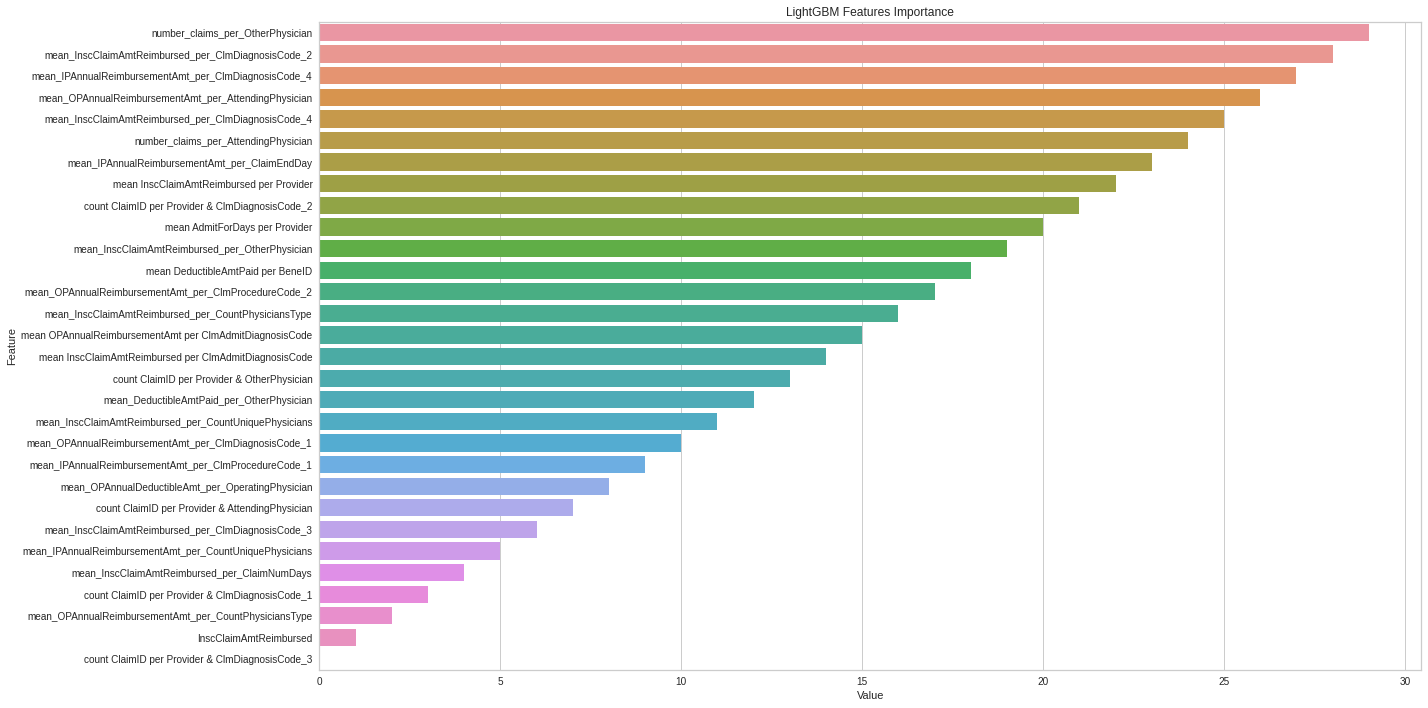

In [ ]:
feature_imp2 = pd.DataFrame(sorted(zip(model2.feature_importances_.argsort()[:60], x_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sn.barplot(x="Value", y="Feature", data=feature_imp2.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features Importance')
plt.tight_layout()
plt.show()

In [ ]:
# train scores
pred_train = model2.predict(x_train)
pred_train = [round(value) for value in pred_train]
print("Train")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = model2.predict(x_test)
pred_test = [round(value) for value in pred_test]
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)

Train
Accuracy: 0.998316
Precision: 0.997996
Recall: 0.984190
F1 score: 0.991045

Test
Accuracy: 0.905281
Precision: 0.903226
Recall: 0.111554
F1 score: 0.198582


# CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

model3  = CatBoostClassifier(iterations=100, learning_rate=0.1)
model3.fit(x_train, y_train,  eval_set=(x_test, y_test), verbose=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


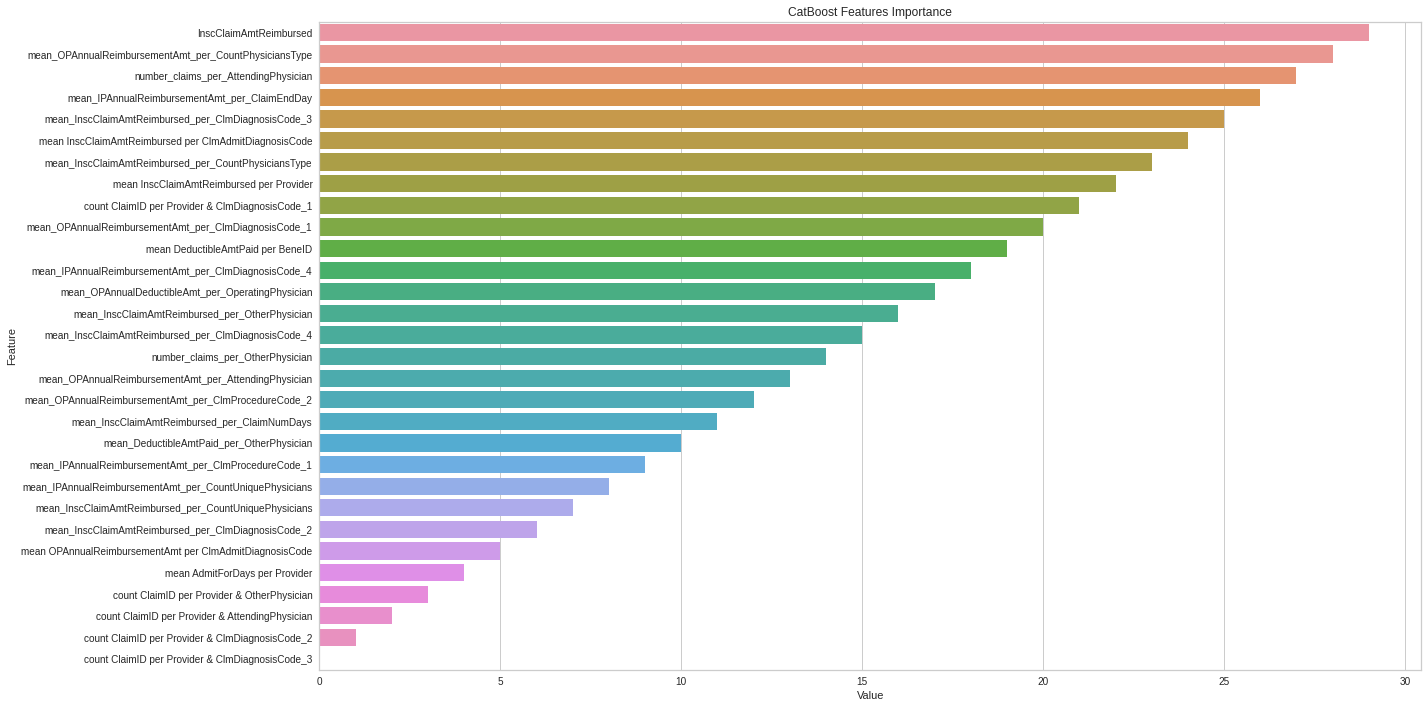

In [ ]:
feature_imp3 = pd.DataFrame(sorted(zip(model3.feature_importances_.argsort()[:60], x_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sn.barplot(x="Value", y="Feature", data=feature_imp3.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features Importance')
plt.tight_layout()
plt.show()

In [ ]:
# train scores
pred_train = model3.predict(x_train)
pred_train = [round(value) for value in pred_train]
print("Train")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, pred_train)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, pred_train)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, pred_train)
print('F1 score: %f' % f1)

pred_test = model3.predict(x_test)
pred_test = [round(value) for value in pred_test]
print("\nTest")
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_test)
print('F1 score: %f' % f1)


Train
Accuracy: 0.934681
Precision: 0.791822
Recall: 0.420949
F1 score: 0.549677

Test
Accuracy: 0.899623
Precision: 1.000000
Recall: 0.045817
F1 score: 0.087619
